In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt

In [2]:
# 1. Loading an Example Dataset
iris = datasets.load_iris()

# Display dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
# 2. Print Output
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Print the shape of the data
print("Data shape:", iris.data.shape)
print("Target shape:", iris.target.shape)

# Print first 5 samples
print("\nFirst 5 samples:")
print(iris.data[:5])
print("Corresponding targets:", iris.target[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
Target shape: (150,)

First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Corresponding targets: [0 0 0 0 0]


In [4]:
# 3. Learn & Predicting
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42)

# Create and train the classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Let's make a prediction for a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Example measurementsa
predicted_class = knn.predict(new_sample)
print(f"Predicted class for new sample: {iris.target_names[predicted_class][0]}")

Model accuracy: 1.00
Predicted class for new sample: setosa


In [5]:
#4. Model Persistence
model_filename = 'iris_knn_model.joblib'
joblib.dump(knn, model_filename)
print(f"Model saved to {model_filename}")

# Load the model from disk
loaded_model = joblib.load(model_filename)

# Verify the loaded model
loaded_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_pred)
print(f"Loaded model accuracy: {loaded_accuracy:.2f} (should be same as before)")

Model saved to iris_knn_model.joblib
Loaded model accuracy: 1.00 (should be same as before)


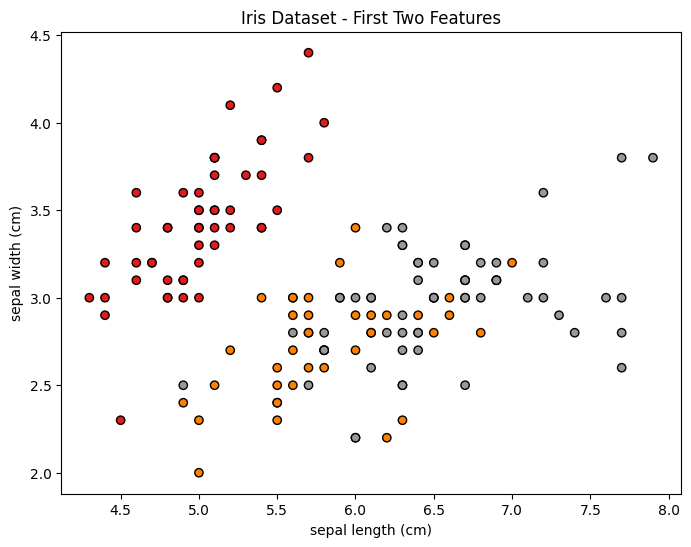

In [6]:
# Visualize two features
plt.figure(figsize=(8, 6))

# Get the first two features
X = iris.data[:, :2]
y = iris.target

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.title("Iris Dataset - First Two Features")
plt.show()